## **Problem Set: Data Ethics in Smart City IoT Sensor Data Management**

### **Scenario**

You are part of a **Smart City analytics team** responsible for collecting and analyzing IoT sensor data to improve urban safety, traffic flow, and environmental monitoring. The city council wants to ensure **ethical handling of data** — from **collection and consent** to **governance, privacy, and compliance**.

You will work with a **synthetic dataset** simulating **vehicle tracking sensors**, **air quality monitors**, and some **citizen-reported incidents**.

***

### **Dataset Setup (Colab-Ready)**

```python
import pandas as pd
import numpy as np

np.random.seed(42)
n = 800

consent_types = ["explicit", "implicit", "none"]
districts = ["Downtown", "Suburban", "Industrial", "Green Zone"]

data = pd.DataFrame({
    "Device_ID": range(1, n+1),
    "Owner_Age": np.random.randint(18, 80, n),
    "District": np.random.choice(districts, n),
    "Consent_Type": np.random.choice(consent_types, n, p=[0.6, 0.3, 0.1]),
    "Vehicle_Count": np.random.randint(0, 200, n),
    "Avg_Speed": np.round(np.random.uniform(10, 80, n), 1),
    "Air_Quality_Index": np.random.randint(10, 300, n),
    "Reported_Incident": np.random.choice([0, 1], n, p=[0.85, 0.15])
})

data.head()
```


***

## **Exercises**

### **1. Data Collection, Privacy \& Consent**

- **Task 1.1:** Write a function to filter dataset to only keep records with valid consent for analytics.
- **Task 1.2:** Compare size before and after consent filtering and discuss trade‑offs.

***

### **2. Implicit vs Explicit Consent**

- **Task 2.1:** Count and plot proportion of explicit, implicit, and none.
- **Task 2.2:** Discuss how **implicit consent** might be risky in IoT sensor deployments.

***

### **3. Bias in Data**

- **Task 3.1:** Check if `Reported_Incident` rates differ significantly by `District`.
- **Task 3.2:** Identify possible causes (sensor density, demographic differences) and how to correct bias.

***

### **4. Data Minimization**

- **Task 4.1:** Select only the necessary columns for traffic congestion analysis, removing unrelated personal or sensitive attributes.
- **Task 4.2:** Explain benefits \& risks of minimization.

***

### **5. Anonymization \& Pseudonymization**

- **Task 5.1:** Remove `Device_ID` or replace with hashed pseudonym.
- **Task 5.2:** Test whether you can still link records across datasets.

***

### **6. De-Anonymization Risks**

- **Task 6.1:** Create an auxiliary dataset with `Owner_Age` + `District`.
- **Task 6.2:** Attempt a simple join to re-identify pseudonymized records and measure percentage matched.

***

### **7. Data Governance \& Stewardship**

- **Task 7.1:** Create a data access control table defining roles (Admin, Analyst, Public).
- **Task 7.2:** Outline responsibilities of a Data Steward for this smart city project.

***

### **8. Data Quality \& Lineage**

- **Task 8.1:** Implement a basic data quality report: missing values, out-of-range `Air_Quality_Index`.
- **Task 8.2:** Create a transformation log tracking each processing step.

***

### **9. Ethical Data Sharing**

- **Task 9.1:** Build a sharable, aggregated version of the dataset by district (no personal info).
- **Task 9.2:** Define rules for approving or denying sharing requests.

***

### **10. Monitoring \& Compliance**

- **Task 10.1:** Write a compliance check that:
    - Alerts if consent compliance ratio <90%
    - Alerts if `Reported_Incident` rate disparity by district >0.15
- **Task 10.2:** Document escalation steps if an alert is triggered.

***

### **Bonus**

- Apply **k-anonymity checks** to District + Age combination.
- Simulate **real-time consent withdrawal** and show how to handle it in downstream analytics.

***

In [1]:
# **Solution Code**
import pandas as pd
import numpy as np
# Create the synthetic dataset
np.random.seed(42)
n = 800
consent_types = ["explicit", "implicit", "none"]
districts = ["Downtown", "Suburban", "Industrial", "Green Zone"]
data = pd.DataFrame({
    "Device_ID": range(1, n+1),
    "Owner_Age": np.random.randint(18, 80, n),
    "District": np.random.choice(districts, n),
    "Consent_Type": np.random.choice(consent_types, n, p=[0.6, 0.3, 0.1]),
    "Vehicle_Count": np.random.randint(0, 200, n),
    "Avg_Speed": np.round(np.random.uniform(10, 80, n), 1),
    "Air_Quality_Index": np.random.randint(10, 300, n),
    "Reported_Incident": np.random.choice([0, 1], n, p=[0.85, 0.15])
})
data.head()

,Device_ID,Owner_Age,District,Consent_Type,Vehicle_Count,Avg_Speed,Air_Quality_Index,Reported_Incident
0,1,56,Green Zone,implicit,171,21.6,48,0
1,2,69,Downtown,explicit,1,71.7,25,0
2,3,46,Green Zone,implicit,101,39.9,31,0
3,4,32,Industrial,explicit,34,21.4,222,0
4,5,60,Downtown,implicit,97,10.9,158,0


In [2]:
# Task 1.1: Filter dataset to keep records with valid consent
def filter_valid_consent(df):
    valid_consent = df[df['Consent_Type'].isin(['explicit', 'implicit'])]
    return valid_consent
# Filter the dataset
filtered_data = filter_valid_consent(data)
# Task 1.2: Compare size before and after consent filtering
original_size = data.shape[0]
filtered_size = filtered_data.shape[0]
print(f"Original size: {original_size}, Filtered size: {filtered_size}")
# Trade-offs: Filtering reduces dataset size, potentially losing valuable data but ensuring ethical compliance.

Original size: 800, Filtered size: 723


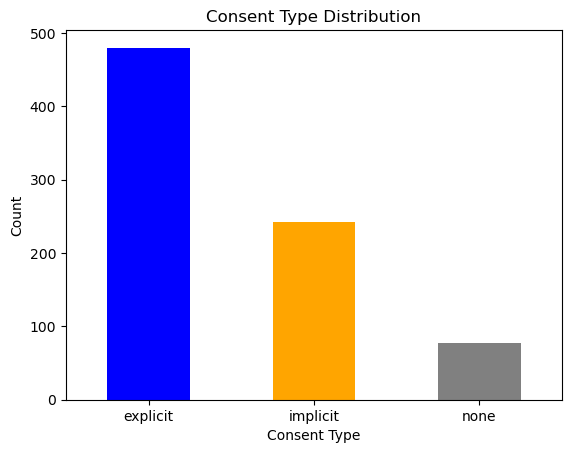

In [4]:
# Task 2.1: Count and plot proportion of consent types
import matplotlib.pyplot as plt
def plot_consent_distribution(df):
    consent_counts = df['Consent_Type'].value_counts()
    consent_counts.plot(kind='bar', color=['blue', 'orange', 'gray'])
    plt.title('Consent Type Distribution')
    plt.xlabel('Consent Type')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()
plot_consent_distribution(data)
# Task 2.2: Discuss implicit consent risks
# Implicit consent can lead to ethical issues as users may not be fully aware of data collection
# and usage, potentially violating privacy expectations. It can also lead to legal challenges if users
# claim they did not consent to data usage.

In [5]:
# Task 3.1: Check if Reported_Incident rates differ by District
def incident_rate_by_district(df):
    incident_rates = df.groupby('District')['Reported_Incident'].mean()
    return incident_rates
incident_rates = incident_rate_by_district(data)
print(incident_rates)
# Task 3.2: Identify possible causes and how to correct bias

District
Downtown      0.120930
Green Zone    0.129213
Industrial    0.115000
Suburban      0.135266
Name: Reported_Incident, dtype: float64


In [6]:
# Task 4.1: Select necessary columns for traffic congestion analysis
def select_traffic_columns(df):
    traffic_columns = df[['District', 'Vehicle_Count', 'Avg_Speed']]
    return traffic_columns
traffic_data = select_traffic_columns(data)
print(traffic_data.head())
# Task 4.2: Explain benefits & risks of minimization

     District  Vehicle_Count  Avg_Speed
0  Green Zone            171       21.6
1    Downtown              1       71.7
2  Green Zone            101       39.9
3  Industrial             34       21.4
4    Downtown             97       10.9


In [7]:
# Task 5.1: Remove Device_ID or replace with hashed pseudonym
def anonymize_data(df):
    df_anonymized = df.drop(columns=['Device_ID'])
    # Alternatively, replace with hashed pseudonym
    # df_anonymized['Device_ID'] = df_anonymized['Device_ID'].
    return df_anonymized
anonymized_data = anonymize_data(data)
print(anonymized_data.head())
# Task 5.2: Test linking records across datasets
# Since Device_ID is removed, we cannot link records across datasets without a unique identifier.
# If pseudonymization was used, we could link using the hashed value.

   Owner_Age    District Consent_Type  Vehicle_Count  Avg_Speed  \
0         56  Green Zone     implicit            171       21.6   
1         69    Downtown     explicit              1       71.7   
2         46  Green Zone     implicit            101       39.9   
3         32  Industrial     explicit             34       21.4   
4         60    Downtown     implicit             97       10.9   

   Air_Quality_Index  Reported_Incident  
0                 48                  0  
1                 25                  0  
2                 31                  0  
3                222                  0  
4                158                  0  


In [8]:

# Task 6.1: Create auxiliary dataset with Owner_Age + District
def create_auxiliary_dataset(df):
    aux_data = df[['Owner_Age', 'District']].copy()
    aux_data['Pseudonym'] = aux_data.index  # Using index as a simple
    return aux_data
auxiliary_data = create_auxiliary_dataset(anonymized_data)
print(auxiliary_data.head())
# Task 6.2: Attempt a simple join to re-identify pseudonymized records
def reidentify_records(aux_df, main_df):
    reidentified = aux_df.merge(main_df, left_on='Pseudonym', right_index =True, how='left')
    matched_percentage = (reidentified['Device_ID'].notnull().sum() / len(aux_df)) * 100
    return reidentified, matched_percentage
reidentified_data, match_percentage = reidentify_records(auxiliary_data, data)
print(f"Percentage of matched records: {match_percentage:.2f}%")

   Owner_Age    District  Pseudonym
0         56  Green Zone          0
1         69    Downtown          1
2         46  Green Zone          2
3         32  Industrial          3
4         60    Downtown          4
Percentage of matched records: 100.00%


In [9]:
# Task 7.1: Create a data access control table
def create_access_control_table():
    access_control = pd.DataFrame({
        "Role": ["Admin", "Analyst", "Public"],
        "Access_Level": ["Full", "Read-Only", "Restricted"],
        "Responsibilities": [
            "Manage data, set policies, ensure compliance",
            "Analyze data, generate reports",
            "View aggregated data, no personal info access"
        ]
    })
    return access_control
access_control_table = create_access_control_table()
print(access_control_table)
# Task 7.2: Outline responsibilities of a Data Steward
# Responsibilities of a Data Steward:
# - Ensure data quality and integrity
# - Maintain data governance policies
# - Facilitate data access and sharing
# - Monitor compliance with ethical standards
# - Act as a liaison between technical teams and stakeholders
# - Provide training on data ethics and governance
# - Handle data-related issues and escalations

      Role Access_Level                               Responsibilities
0    Admin         Full   Manage data, set policies, ensure compliance
1  Analyst    Read-Only                 Analyze data, generate reports
2   Public   Restricted  View aggregated data, no personal info access


In [10]:
# Task 8.1: Implement a basic data quality report
def data_quality_report(df):
    report = {
        "Missing_Values": df.isnull().sum(),
        "Out_of_Range_AQI": df['Air_Quality_Index'][(df['Air_Quality_Index'] < 0) | (df['Air_Quality_Index'] > 500)].count(),
        "Total_Records": df.shape[0]
    }
    return pd.Series(report)
quality_report = data_quality_report(data)
print(quality_report)
# Task 8.2: Create a transformation log tracking each processing
def create_transformation_log():
    log = pd.DataFrame({
        "Step": ["Filter Valid Consent", "Select Traffic Columns", "Anonymize Data"],
        "Description": [
            "Filtered dataset to keep records with valid consent",
            "Selected necessary columns for traffic congestion analysis",
            "Removed Device_ID or replaced with hashed pseudonym"
        ],
        "Timestamp": pd.to_datetime("now")
    })
    return log
transformation_log = create_transformation_log()


Missing_Values      Device_ID            0
Owner_Age            0
...
Out_of_Range_AQI                                                    0
Total_Records                                                     800
dtype: object


In [12]:
# Task 9.1: Build a sharable, aggregated version of the dataset by district
def create_aggregated_dataset(df):
    aggregated_data = df.groupby('District').agg({
        'Vehicle_Count': 'mean',
        'Avg_Speed': 'mean',
        'Air_Quality_Index': 'mean',
        'Reported_Incident': 'mean'
    }).reset_index()
    return aggregated_data
aggregated_data = create_aggregated_dataset(data)
print(aggregated_data)
# Task 9.2: Define rules for approving or denying sharing requests
# Rules for approving or denying sharing requests:
# - Requests must be for research or public safety purposes


     District  Vehicle_Count  Avg_Speed  Air_Quality_Index  Reported_Incident
0    Downtown     103.930233  44.347907         148.883721           0.120930
1  Green Zone     100.011236  44.689326         160.578652           0.129213
2  Industrial     105.100000  46.230500         148.280000           0.115000
3    Suburban      95.729469  43.542512         163.362319           0.135266


In [11]:
# Task 10.1: Write a compliance check
def compliance_check(df):
    consent_compliance = (df['Consent_Type'].isin(['explicit', 'implicit'])).mean()
    incident_rate_disparity = df.groupby('District')['Reported_Incident'].mean().diff().abs().max()
    alerts = []
    if consent_compliance < 0.9:
        alerts.append("Consent compliance ratio < 90%")
    if incident_rate_disparity > 0.15:
        alerts.append("Reported Incident rate disparity by district > 0.15")
    return alerts
alerts = compliance_check(data)
if alerts:
    print("Compliance Alerts:")
    for alert in alerts:
        print(f"- {alert}")
else:
    print("No compliance issues detected.")

No compliance issues detected.
